<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
!curl -s https://course.fast.ai/colab/setup | bash

In [ ]:
!pip install fastai2 --upgrade > /dev/null

In [ ]:
#hide
#colab
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from fastai2.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_TINY)

In [3]:
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(),
    item_tfms=Resize(28),
    batch_tfms=[]
)

In [4]:
datablock.summary(path)

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /Users/butch/.fastai/data/mnist_tiny/train/7/9243.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /Users/butch/.fastai/data/mnist_tiny/train/7/9243.png
    applying parent_label gives
      7
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(1))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=28x28, TensorCategory(1))
    applying Resize gives
      (PILImageBW mode=L size=2

In [5]:
dls = datablock.dataloaders(path)

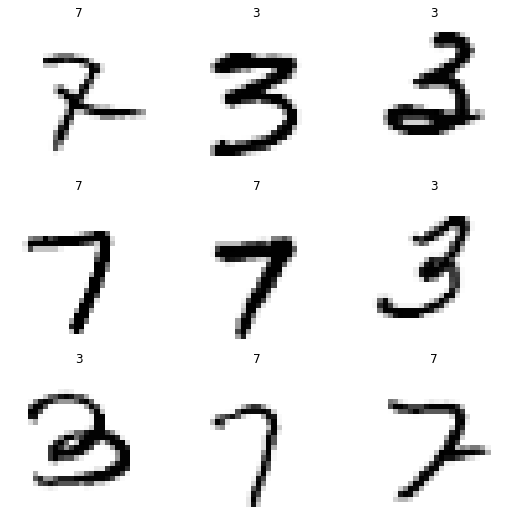

In [6]:
dls.show_batch()

In [7]:
learner = cnn_learner(dls, alexnet, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /Users/butch/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [8]:
learner.summary()

RuntimeError: Given input size: (192x2x2). Calculated output size: (192x0x0). Output size is too small

In [11]:
learner = cnn_learner(dls, resnet18, metrics=accuracy, opt_func=SGD)

In [12]:
learner.summary()

Sequential (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 14 x 14    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 14 x 14    128        True      
________________________________________________________________
ReLU                 64 x 64 x 14 x 14    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 7 x 7      0          False     
________________________________________________________________
Conv2d               64 x 64 x 7 x 7      36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 7 x 7      128        True      
________________________________________________________________
ReLU                 64 x 64 x 7 x 7      0          False     
___________________________________________________

In [13]:
learner.wd_bn_bias

False

In [14]:
learner.fit(1,lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.140227,0.791532,0.519313,00:15


In [15]:
learner.fit(10,lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.081549,0.844730,0.535050,00:14
1,0.998293,0.795291,0.556509,00:14
2,0.952209,0.688622,0.623748,00:14
3,0.939883,0.618122,0.650930,00:14
4,0.930532,0.578174,0.686695,00:14
5,0.920849,0.541732,0.716738,00:14
6,0.894360,0.515756,0.742489,00:14
7,0.875680,0.498612,0.742489,00:14
8,0.844649,0.474820,0.758226,00:14
9,0.807186,0.448703,0.798283,00:14


In [16]:
%timeit
learner.fit(20,lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.717846,0.447404,0.796853,00:14
1,0.701267,0.430635,0.798283,00:14
2,0.678428,0.416647,0.809728,00:14
3,0.650394,0.401261,0.822604,00:14
4,0.623968,0.379458,0.841202,00:14
5,0.608785,0.375489,0.831187,00:14
6,0.615184,0.366129,0.841202,00:14
7,0.596886,0.357960,0.846924,00:14
8,0.573839,0.347584,0.864092,00:14
9,0.557128,0.339520,0.855508,00:14


In [17]:
%timeit learner.fit(20,lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.361845,0.264043,0.909871,00:14
1,0.338599,0.255041,0.915594,00:14
2,0.355070,0.251709,0.909871,00:14
3,0.369649,0.241889,0.914163,00:14
4,0.362715,0.238208,0.919886,00:14
5,0.359822,0.235703,0.917024,00:14
6,0.354073,0.233433,0.911302,00:14
7,0.345470,0.227964,0.919886,00:14
8,0.337191,0.224390,0.921316,00:14
9,0.327125,0.217334,0.925608,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.241379,0.189907,0.932761,00:14
1,0.241252,0.187551,0.935622,00:14
2,0.241316,0.184173,0.939914,00:14
3,0.237732,0.177933,0.944206,00:15
4,0.230465,0.185951,0.934192,00:15
5,0.232735,0.181054,0.939914,00:15
6,0.230071,0.180957,0.937053,00:15
7,0.220286,0.177879,0.937053,00:15
8,0.214231,0.172464,0.935622,00:15
9,0.218660,0.165961,0.938484,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.221464,0.158813,0.945637,00:16
1,0.183886,0.157548,0.947067,00:16
2,0.175355,0.153216,0.944206,00:16
3,0.174035,0.153555,0.947067,00:16
4,0.169273,0.148172,0.949928,00:16
5,0.180499,0.148703,0.945637,00:16
6,0.174771,0.149866,0.948498,00:16
7,0.171486,0.147031,0.951359,00:15
8,0.176926,0.145674,0.952790,00:15
9,0.177065,0.145383,0.951359,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.129601,0.132996,0.958512,00:15
1,0.129946,0.133433,0.957082,00:15
2,0.128208,0.129892,0.955651,00:15
3,0.120742,0.132465,0.955651,00:15
4,0.138095,0.126904,0.957082,00:15
5,0.138132,0.127653,0.958512,00:15
6,0.137143,0.129716,0.955651,00:15
7,0.135820,0.127106,0.959943,00:15
8,0.131570,0.127648,0.954220,00:15
9,0.134062,0.124646,0.954220,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.107820,0.119149,0.958512,00:15
1,0.103584,0.119928,0.961373,00:15
2,0.109780,0.117310,0.955651,00:15
3,0.120818,0.110927,0.962804,00:15
4,0.121658,0.114518,0.959943,00:15
5,0.119774,0.110626,0.959943,00:15
6,0.113971,0.111588,0.962804,00:15
7,0.111001,0.115789,0.958512,00:15
8,0.107010,0.112649,0.958512,00:15
9,0.103320,0.112497,0.955651,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.092167,0.103575,0.961373,00:15
1,0.092147,0.105561,0.961373,00:16
2,0.097012,0.106281,0.964235,00:15
3,0.097692,0.102113,0.962804,00:15
4,0.106139,0.102522,0.965665,00:15
5,0.098633,0.104275,0.959943,00:15
6,0.096710,0.106977,0.959943,00:15
7,0.091889,0.102852,0.962804,00:15
8,0.094292,0.102722,0.965665,00:15
9,0.099691,0.101845,0.965665,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.078780,0.098427,0.962804,00:15
1,0.077797,0.099750,0.967096,00:15
2,0.077928,0.100336,0.965665,00:15
3,0.069888,0.100538,0.965665,00:15
4,0.068005,0.099084,0.965665,00:14
5,0.076393,0.097958,0.967096,00:15
6,0.073143,0.097704,0.965665,00:15
7,0.074439,0.097380,0.967096,00:15
8,0.076126,0.095434,0.968526,00:15
9,0.072238,0.096098,0.965665,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.055900,0.093608,0.968526,00:15
1,0.057862,0.095118,0.965665,00:15
2,0.055557,0.093023,0.969957,00:15
3,0.057780,0.093787,0.969957,00:15
4,0.055363,0.092301,0.968526,00:15
5,0.057437,0.093534,0.968526,00:15
6,0.059653,0.093754,0.968526,00:15
7,0.062564,0.092330,0.967096,00:14
8,0.061531,0.093593,0.968526,00:15
9,0.060313,0.092729,0.967096,00:15


5min 7s ± 4.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


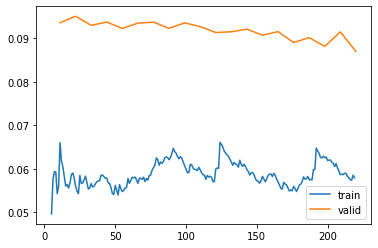

In [19]:
learner.recorder.plot_loss()

In [23]:
learner.opt.hypers

(#3) [{'wd': 0.0, 'lr': 0.001, 'mom': 0.0},{'wd': 0.0, 'lr': 0.001, 'mom': 0.0},{'wd': 0.0, 'lr': 0.001, 'mom': 0.0}]

In [24]:
model = learner.model

In [26]:
xb,yb = dls.one_batch()

In [27]:
model.summary(xb)

Sequential (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 14 x 14    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 14 x 14    128        True      
________________________________________________________________
ReLU                 64 x 64 x 14 x 14    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 7 x 7      0          False     
________________________________________________________________
Conv2d               64 x 64 x 7 x 7      36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 7 x 7      128        True      
________________________________________________________________
ReLU                 64 x 64 x 7 x 7      0          False     
___________________________________________________

In [28]:
path

Path('/Users/butch/.fastai/data/mnist_tiny')

In [29]:
dls.path

Path('.')

In [30]:
learner.model_dir

'models'

In [31]:
dls.show([1])

In [32]:
dls.show([0])

In [33]:
dls.show?